<a href="https://colab.research.google.com/github/Francisco2963/Proyecto-2-Parte-I-Core-ML/blob/v2.1.0/Proyecto_2_Parte_II_(core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1- Parte final (Core)

**Análisis y Predicción de Ventas en una Tienda de Retail**


Objetivo: Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.



Instrucciones Detalladas

Parte 1: Exploración y Visualización de Datos (EDA)

Carga y Exploración Inicial de Datos:

Cargar el dataset y revisar su estructura básica.

Describir las variables y su distribución.

Identificar y tratar valores nulos y outliers.

Análisis de Correlación:

Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

Visualización de Datos:

Crear subplots para comparar diferentes variables clave.

Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

Parte 2: Preprocesamiento de Datos

Transformación de Columnas:

Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

Realizar codificación de variables categóricas y escalado de variables numéricas.

Pipelines:

Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.


Parte 3: Benchmarking de Técnicas de Machine Learning

Selección de Modelos:

Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).

Utilizar validación cruzada para evaluar el rendimiento de los modelos.

Comparación de Modelos:

Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

Seleccionar el mejor modelo basado en las métricas obtenidas.


Parte 4: Análisis de Métricas

Informe de Clasificación:

Generar un informe de clasificación para los modelos evaluados.

Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.

Curva ROC y AUC:

Crear y visualizar la curva ROC para los modelos de clasificación binaria.

Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.


Parte 5: Presentación de Resultados

Preparación de la Presentación (One-Page en PPT):

Introducción y objetivos del proyecto.

Descripción del conjunto de datos.

Principales análisis y hallazgos.

Visualizaciones clave con explicación.

Conclusiones y recomendaciones.

Subida a GitHub:

Subir todo el código y los resultados a una nueva rama en el repositorio de GitHub.

Generar un Pull Request (PR) para revisión y aprobación.

Crear un tag para esta versión del proyecto (v1.0.0) y liberar la versión.


Ejemplo de Estructura del Repositorio en GitHub

/Proyecto1

|-- /data

| |-- dataset.csv

|-- /notebooks

| |-- EDA.ipynb

| |-- Preprocessing.ipynb

| |-- Benchmarking.ipynb

|-- /reports

| |-- classification_report.txt

| |-- confusion_matrix.png

| |-- roc_curve.png

|-- /presentation

| |-- onepage_presentation.pptx

|-- README.md



Contenido del Archivo README.md

Título del Proyecto: Análisis y Predicción de Ventas en una Tienda de Retail
Descripción: Breve descripción del objetivo del proyecto y su importancia.
Estructura del Repositorio: Explicación de la estructura del repositorio y contenido de cada carpeta.

Instrucciones para Ejecutar: Pasos para ejecutar los notebooks y reproducir los resultados.

Autores: Nombres y roles de los participantes en el proyecto.

Licencia: Información sobre la licencia del proyecto.


# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [ ]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Cambiaremos el tipo de dato de la columna Date de objeto a datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


Al cambiar nuestro tipo de dato de la columna Date, podemos ver que la columna tiene datos de fecha y hora, por lo tanto mas adelante separemos esas columnas

In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.

Para crear una nueva columna de ventas tenemos dos opciones:

1.- podemos renombrar la columna 'Total Amount' que signica  cantidad total, que a su vez es la multiplicacion de precio unitario por cantidad, lo que daria las ventas

2.- podemos crear una nueva columna 'sales' (ventas) basada en la columna 'Total Amount'

Eligiremos la segunda opcion y lo guardaremos en una nueva variable df-1

In [ ]:
df_1 = df['Sales'] = df['Total Amount']
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


Clasifica los datos:

Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [ ]:
df_1 = df['Sales'].unique()
df_1

array([ 150, 1000,   30,  500,  100,   50,  600,  200,   75, 1500,  120,
       2000,  900,  300, 1200,   90,   25,   60])

In [ ]:
df_1 = df['Sales'].dtype
df_1

dtype('int64')

Para crear la columna 'categoria de ventas' ocupamos el metodo pd.cut que nos sirve para categorizar nuestros datos numericos de la columna sales en intervalos definidos con float('int') cualquier valor superior a 1500 caera en la categoria 'Alta'

In [ ]:
bins = [0, 800, 1500, float('inf')]
labels = ['Baja', 'Media', 'Alta']

df_1 = df['categoria_ventas'] = pd.cut(df['Sales'], bins = bins, labels = labels)
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja


Creamos nuestra columna categoria de ventas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Sales             1000 non-null   int64         
 10  categoria_ventas  1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(6), object(3)
memory usage: 79.4+ KB


Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

Para poder agrupar por categoria como producto y tienda, debemos crear la columna tienda

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


Crearemos un diccionario que este relacionado con la columna Product Category para poder asignar una tienda a cada fila del DataFrame

In [ ]:
df['Tienda'] = df['Product Category']

dicc = {'Clothing': 1, 'Electronics': 2, 'Beauty': 3}
df['Tienda'] = df['Tienda'].map(dicc)

df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3


Con el diccionario hemos creado nuestra columna tienda

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Sales             1000 non-null   int64         
 10  categoria_ventas  1000 non-null   category      
 11  Tienda            1000 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(7), object(3)
memory usage: 87.2+ KB


En info ya se puede apreciar la columna tienda creada con un diccionario indicando las Tiendas 1, 2, 3

In [ ]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3


NOTA:

La columna Date esta compuesta de la fecha y la hora, crearemos nuevas columnas para cada una de ellas, las columnas creadas seran, año, mes y dia para fecha, y hora, minutos y segundos para hora

In [ ]:
df['Date'].unique()

<DatetimeArray>
['2023-11-24 00:00:00', '2023-02-27 00:00:00', '2023-01-13 00:00:00',
 '2023-05-21 00:00:00', '2023-05-06 00:00:00', '2023-04-25 00:00:00',
 '2023-03-13 00:00:00', '2023-02-22 00:00:00', '2023-12-13 00:00:00',
 '2023-10-07 00:00:00',
 ...
 '2023-09-26 00:00:00', '2023-07-04 00:00:00', '2023-05-30 00:00:00',
 '2023-10-21 00:00:00', '2023-09-03 00:00:00', '2023-03-02 00:00:00',
 '2023-08-02 00:00:00', '2023-04-17 00:00:00', '2023-03-30 00:00:00',
 '2023-05-28 00:00:00']
Length: 345, dtype: datetime64[ns]

Crearemos nuestras nuevas columnas para poder separar las fechas año, mes y dia ademas de hora, minutos y segundos

In [ ]:
df['Año'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day
df['Hora'] = df['Date'].dt.hour
df['Minutos'] = df['Date'].dt.minute
df['Segundos'] = df['Date'].dt.second

In [ ]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Año,Mes,Dia,Hora,Minutos,Segundos
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3,2023,11,24,0,0,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media,1,2023,2,27,0,0,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,2,2023,1,13,0,0,0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja,1,2023,5,21,0,0,0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3,2023,5,6,0,0,0


Como podemos ver, ya tenemos todas las columnas nuevas creadas para separa la columna date en fecha y hora

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Sales             1000 non-null   int64         
 10  categoria_ventas  1000 non-null   category      
 11  Tienda            1000 non-null   int64         
 12  Año               1000 non-null   int32         
 13  Mes               1000 non-null   int32         
 14  Dia               1000 no

Veremos los valores unicos de cada columna

In [ ]:
df['Año'].nunique()

2

In [ ]:
df['Año'].unique()

array([2023, 2024], dtype=int32)

In [ ]:
df['Mes'].nunique()

12

In [ ]:
df['Mes'].unique()

array([11,  2,  1,  5,  4,  3, 12, 10,  8,  9,  6,  7], dtype=int32)

In [ ]:
df['Dia'].nunique()

31

In [ ]:
df['Dia'].unique()

array([24, 27, 13, 21,  6, 25, 22,  7, 14, 30,  5, 17, 16, 15, 12, 29, 26,
        3, 23, 18,  4, 19,  2, 10, 31,  9,  1, 28,  8, 11, 20],
      dtype=int32)

In [ ]:
df['Hora'].nunique()

1

In [ ]:
df['Hora'].unique()

array([0], dtype=int32)

In [ ]:
df['Minutos'].nunique()

1

In [ ]:
df['Minutos'].unique()

array([0], dtype=int32)

In [ ]:
df['Segundos'].nunique()

1

In [ ]:
df['Segundos'].unique()

array([0], dtype=int32)

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Año,Mes,Dia,Hora,Minutos,Segundos
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3,2023,11,24,0,0,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media,1,2023,2,27,0,0,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,2,2023,1,13,0,0,0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja,1,2023,5,21,0,0,0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3,2023,5,6,0,0,0


NOTA:

Ya tenemos todas nuestras nuevas columnas y eliminaremos aquellas que no tienen informacion como las columnas de hora, minutos y segundos ya que no tienen informacion para nuestro analisis

In [ ]:
df = df.drop(['Hora','Minutos','Segundos'], axis = 1)

In [ ]:
df.head(5)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Año,Mes,Dia
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media,1,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,2,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja,1,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3,2023,5,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Sales             1000 non-null   int64         
 10  categoria_ventas  1000 non-null   category      
 11  Tienda            1000 non-null   int64         
 12  Año               1000 non-null   int32         
 13  Mes               1000 non-null   int32         
 14  Dia               1000 no

Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

Realizaremos algunas agrupaciones de columnas con el metodo groupby.

Calcula la cantidad vendida por cada producto

In [ ]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
df['Quantity'].unique()

array([3, 2, 1, 4])

In [ ]:
cantidad_vendida = df.groupby('Product Category')['Quantity'].sum()
cantidad_vendida


,Quantity
Product Category,
Beauty,771
Clothing,894
Electronics,849


Calcula los productos vendidos por tienda

In [ ]:
productos_vendidos = df.groupby('Tienda')['Product Category'].count()
productos_vendidos

,Product Category
Tienda,
1,351
2,342
3,307


Calcula las ventas por tiendas

In [ ]:
ventas_por_tienda = df.groupby('Tienda')['Sales'].sum()
ventas_por_tienda

,Sales
Tienda,
1,155580
2,156905
3,143515


Cuantas ventas se realizaron por mes

In [ ]:
ventas_por_mes = df.groupby('Mes')['Sales'].count()
ventas_por_mes

,Sales
Mes,
1,78
2,85
3,73
4,86
5,105
6,77
7,72
8,94
9,65


Muestrea el producto más vendido y la cantidad vendida total en cada tienda

In [ ]:
producto_mas_vendido = df.groupby(['Tienda','Product Category'])['Quantity'].sum().reset_index()
producto_mas_vendido

,Tienda,Product Category,Quantity
0,1,Clothing,894
1,2,Electronics,849
2,3,Beauty,771


In [ ]:
Prod_mas_vend = df.groupby('Tienda')['Quantity'].agg(['max','sum'])
Prod_mas_vend

,max,sum
Tienda,,
1,4,894
2,4,849
3,4,771


 ¿Cuál es el producto más vendido en general?

In [ ]:
producto_mas_vendido = df.groupby('Product Category')['Quantity'].sum().idxmax()
producto_mas_vendido

'Clothing'

cual es la Suma de ventas por producto y año

In [ ]:
suma_ventas_por_producto_año = df.groupby(['Product Category','Año'])['Sales'].sum()
suma_ventas_por_producto_año

Product Category  Año 
Beauty            2023    142015
                  2024      1500
Clothing          2023    155580
Electronics       2023    156875
                  2024        30
Name: Sales, dtype: int64

cual es la Suma de ventas por producto y mes

In [ ]:
suma_ventas_por_producto_mes = df.groupby(['Product Category','Mes'])['Sales'].sum()
suma_ventas_por_producto_mes

Product Category  Mes
Beauty            1      13930
                  2      14035
                  3      10545
                  4      11905
                  5      12450
                  6      10995
                  7      16090
                  8       9790
                  9       6320
                  10     15355
                  11      9700
                  12     12400
Clothing          1      13125
                  2      14560
                  3      15065
                  4      13940
                  5      17455
                  6      10170
                  7       8250
                  8      12455
                  9       9975
                  10     13315
                  11     15200
                  12     12070
Electronics       1       9925
                  2      15465
                  3       3380
                  4       8025
                  5      23245
                  6      15550
                  7      11125
                  8      14715
                  9       7325
                  10     17910
                  11     10020
                  12     20220
Name: Sales, dtype: int64

cual es la Suma  de ventas por producto y dia

In [ ]:
producto_mas_vendido = df.groupby(['Product Category','Dia'])['Sales'].sum()
producto_mas_vendido

Product Category  Dia
Beauty            1      7255
                  2      2270
                  3      3765
                  4      6830
                  5      3485
                         ... 
Electronics       27     3700
                  28     3695
                  29      835
                  30     1100
                  31     4000
Name: Sales, Length: 93, dtype: int64

Suma y promedio de ventas por producto y mes

In [ ]:
grouped = df.groupby(['Product Category', 'Mes'])
ventas_por_producto_y_mes = grouped['Sales'].agg(['sum', 'mean'])
ventas_por_producto_y_mes

sum        mean
Product Category Mes                   
Beauty           1    13930  535.769231
                 2    14035  539.807692
                 3    10545  502.142857
                 4    11905  410.517241
                 5    12450  444.642857
                 6    10995  439.800000
                 7    16090  595.925926
                 8     9790  407.916667
                 9     6320  316.000000
                 10   15355  495.322581
                 11    9700  388.000000
                 12   12400  496.000000
Clothing         1    13125  504.807692
                 2    14560  441.212121
                 3    15065  396.447368
                 4    13940  387.222222
                 5    17455  471.756757
                 6    10170  363.214286
                 7     8250  434.210526
                 8    12455  389.218750
                 9     9975  498.750000
                 10   13315  443.833333
                 11   15200  584.615385
                 12   12070  464.230769
Electronics      1     9925  381.730769
                 2    15465  594.807692
                 3     3380  241.428571
                 4     8025  382.142857
                 5    23245  581.125000
                 6    15550  647.916667
                 7    11125  427.884615
                 8    14715  387.236842
                 9     7325  293.000000
                 10   17910  511.714286
                 11   10020  371.111111
                 12   20220  505.500000

Analizar la cantidad de ventas por tienda y el monto total vendido por cada tienda en el año

In [ ]:
grouped = df.groupby(['Tienda', 'Año'])
ventas_por_tienda_y_año = grouped['Sales'].agg(['sum','count'])
ventas_por_tienda_y_año

sum  count
Tienda Año                
1      2023  155580    351
2      2023  156875    341
       2024      30      1
3      2023  142015    306
       2024    1500      1

In [ ]:
ventas_por_tienda_y_año.index

MultiIndex([(1, 2023),
            (2, 2023),
            (2, 2024),
            (3, 2023),
            (3, 2024)],
           names=['Tienda', 'Año'])

In [ ]:
ventas_por_tienda_y_año.values

array([[155580,    351],
       [156875,    341],
       [    30,      1],
       [142015,    306],
       [  1500,      1]])

In [ ]:

promedio_ventas_por_tienda = df.groupby('Tienda')['Sales'].mean()
promedio_ventas_por_tienda

,Sales
Tienda,
1,443.247863
2,458.786550
3,467.475570


La desviacion estandar de las 3 tiendas muestran un vlor alto, lo que indica que las ventas en las 3 tiendas varian mucho de un dia a otro o de un periodo a otro.

In [ ]:
# Desviación estándar de las ventas por tienda
desviacion_estandar_ventas = df.groupby('Tienda')['Sales'].std()
desviacion_estandar_ventas

,Sales
Tienda,
1,550.695917
2,567.540150
3,563.612788


In [ ]:
# Varianza de las ventas por tienda
varianza_ventas = df.groupby('Tienda')['Sales'].var()
varianza_ventas

,Sales
Tienda,
1,303265.992674
2,322101.822341
3,317659.374401


Análisis Personalizado con apply

Función personalizada:

Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar. Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.

Podemos ver que las venta de la tienda C se encuentran  por debajo del pormedio de la tiendas, a excepcion de la fila 4 que se encuentra 32 unidades por encima del promedio de ventas de esa tienda.


In [ ]:
df_grouped = df.groupby('Tienda')['Sales'].mean().reset_index(name='mean_sales')
df_1 = pd.merge(df, df_grouped, on='Tienda')
df_1['deviation'] = df_1.apply(lambda x: x['Sales'] - x['mean_sales'], axis=1)
df_1

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Año,Mes,Dia,mean_sales,deviation
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3,2023,11,24,467.47557,-317.47557
1,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3,2023,5,6,467.47557,-367.47557
2,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30,Baja,3,2023,4,25,467.47557,-437.47557
3,12,2023-10-30,CUST012,Male,35,Beauty,3,25,75,75,Baja,3,2023,10,30,467.47557,-392.47557
4,21,2023-01-14,CUST021,Female,50,Beauty,1,500,500,500,Baja,3,2023,1,14,467.47557,32.52443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,989,2023-12-28,CUST989,Female,44,Electronics,1,25,25,25,Baja,2,2023,12,28,458.78655,-433.78655
996,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60,60,Baja,2,2023,8,21,458.78655,-398.78655
997,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150,150,Baja,2,2023,2,6,458.78655,-308.78655
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,Baja,2,2023,12,5,458.78655,-308.78655


In [ ]:
df_1['deviation'].describe()

,deviation
count,1.000000e+03
mean,3.092282e-14
std,5.599081e+02
min,-4.424756e+02
25%,-3.924756e+02
50%,-3.203617e+02
75%,4.325244e+02
max,1.556752e+03


In [ ]:
df_1['mean_sales'].describe()

,mean_sales
count,1000.000000
mean,456.000000
std,10.013133
min,443.247863
25%,443.247863
50%,458.786550
75%,467.475570
max,467.475570


# VISUALIZACION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_1.head(5)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Año,Mes,Dia,mean_sales,deviation
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3,2023,11,24,467.47557,-317.47557
1,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3,2023,5,6,467.47557,-367.47557
2,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30,Baja,3,2023,4,25,467.47557,-437.47557
3,12,2023-10-30,CUST012,Male,35,Beauty,3,25,75,75,Baja,3,2023,10,30,467.47557,-392.47557
4,21,2023-01-14,CUST021,Female,50,Beauty,1,500,500,500,Baja,3,2023,1,14,467.47557,32.52443


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Sales             1000 non-null   int64         
 10  categoria_ventas  1000 non-null   category      
 11  Tienda            1000 non-null   int64         
 12  Año               1000 non-null   int32         
 13  Mes               1000 non-null   int32         
 14  Dia               1000 no

In [ ]:
df_1.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Sales,Tienda,Año,Mes,Dia,mean_sales,deviation
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,2023-07-03 00:25:55.199999744,41.39200,2.514000,179.890000,456.000000,456.000000,1.956000,2023.002000,6.549000,15.310000,456.000000,3.092282e-14
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,25.000000,1.000000,2023.000000,1.000000,1.000000,443.247863,-4.424756e+02
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,60.000000,1.000000,2023.000000,4.000000,7.000000,443.247863,-3.924756e+02
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,135.000000,2.000000,2023.000000,6.000000,15.000000,458.786550,-3.203617e+02
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,900.000000,3.000000,2023.000000,10.000000,23.000000,467.475570,4.325244e+02
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2000.000000,3.000000,2024.000000,12.000000,31.000000,467.475570,1.556752e+03
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,559.997632,0.810383,0.044699,3.452755,8.871674,10.013133,5.599081e+02


In [ ]:
df_1.duplicated().sum()

0

In [ ]:
df_1['Año'].unique()

array([2023, 2024], dtype=int32)

In [ ]:
df_1['Año'].value_counts()

,count
Año,
2023,998
2024,2


In [ ]:
df_1['Sales'].unique()

array([ 150,  100,   30,   75,  500,   50,  900,   90,  200, 1500,  300,
        120, 1200, 2000, 1000,  600,   25,   60])

In [ ]:
cantidad_vendida = df.groupby('Product Category')['Sales'].sum()
cantidad_vendida

,Sales
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


In [ ]:
fil_ventas = cantidad_vendida = df.groupby('Product Category')['Sales'].sum()
fil_ventas

,Sales
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


In [ ]:
fil_ventas.index

Index(['Beauty', 'Clothing', 'Electronics'], dtype='object', name='Product Category')

In [ ]:
fil_ventas.values

array([143515, 155580, 156905])

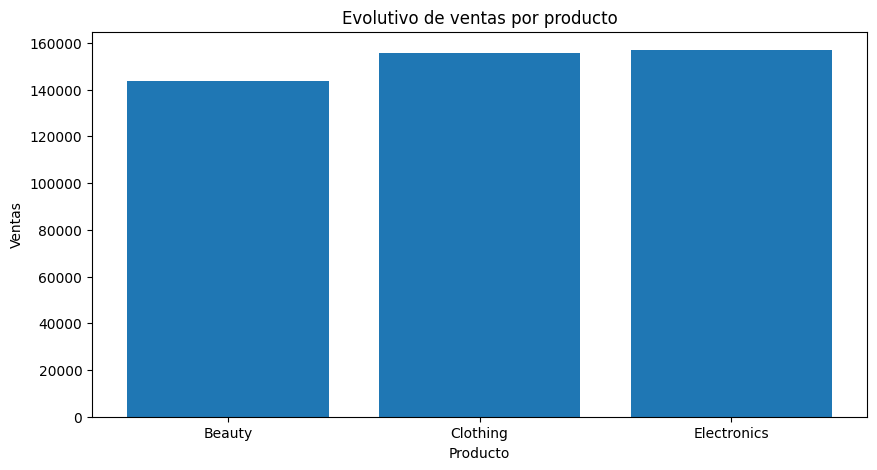

In [ ]:
plt.figure(figsize = (10, 5))
plt.bar(fil_ventas.index, fil_ventas.values)
plt.title('Evolutivo de ventas por producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
#plt.xticks(rotation = 70)
plt.show()

Este grafico muestra las ventas de las tienda , en el cual la tienda que vende productos electronicos es la que tiene mayores ingresos por ventas

In [ ]:
ventas_por_tienda_y_año.index

MultiIndex([(1, 2023),
            (2, 2023),
            (2, 2024),
            (3, 2023),
            (3, 2024)],
           names=['Tienda', 'Año'])

In [ ]:
ventas_por_tienda_y_año.values

array([[155580,    351],
       [156875,    341],
       [    30,      1],
       [142015,    306],
       [  1500,      1]])

In [ ]:
años = ventas_por_tienda_y_año.index.get_level_values('Año')
ventas = ventas_por_tienda_y_año.values

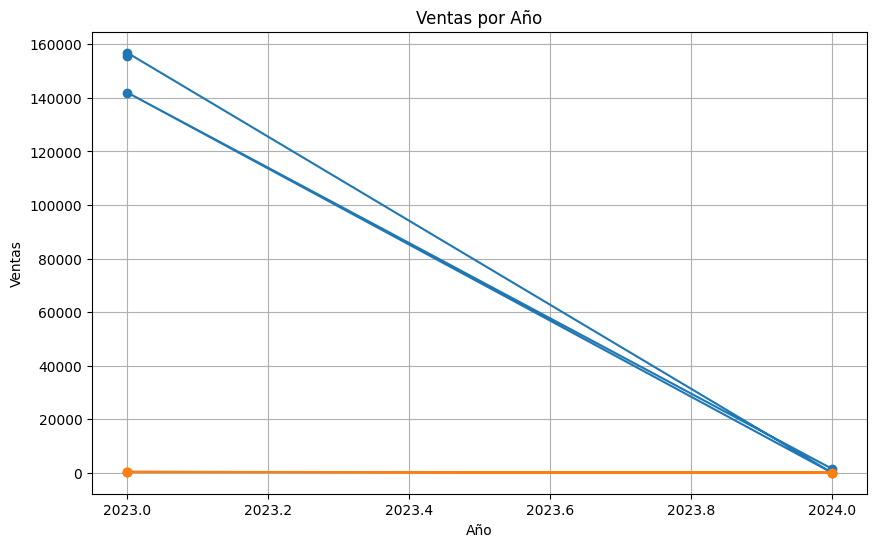

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(años, ventas, marker='o')
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

En este grafico se muestran las ventas por cada tienda, podmeos ver que la tienda 1 y 2 tienen ventas cercanas a las 160 mil, mientras la tienda 3 tiene ventas cercanas a los 140 mil

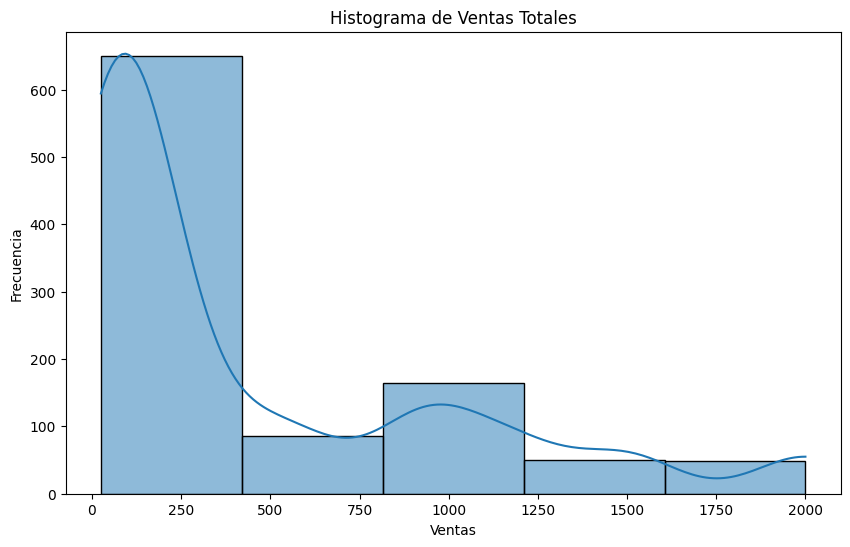

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'],bins= 5, kde=True)
plt.title("Histograma de Ventas Totales")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

En el Histograma de ventas de los 3 tipos de tiendas podemos ver que las ventas de poco valor son las que mas se realizan,teniendo el pico por sobre las 650 unidades vendidas en productos con valores no superiores a los 450 aprox, sin embargo el grafico muestra que la curva de ventas baja significativamente hacia las ventas mas altas, llegando a vender alrededor de 150 unidades por un valor cercano a los 1000, lo que es muy bajo para la tienda de retail

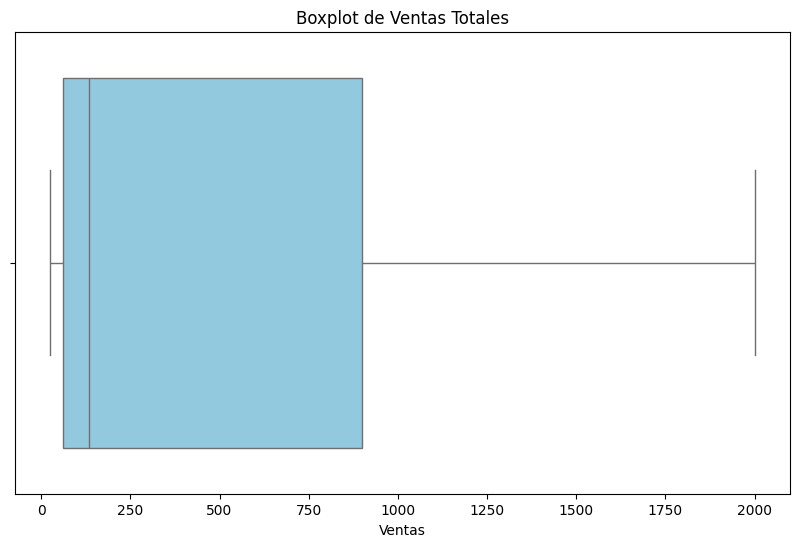

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales', data=df, color='skyblue')
plt.title("Boxplot de Ventas Totales")
plt.xlabel("Ventas")
plt.show()

El boxplot de ventas totales corrobora lo analizado en el Histograma de ventas totales, se puede apreciar que los bigotes del boxplot se encuentran entre 0 y 2000 lo que siguiere que algunas tiendas no venden nada y otras venden 2000 (muy pocas tiendas venden esa cantidad) el boxplot no muestra valores atipicos o outlier fuera de sus bigotes.

 Como muestra la caja, el rango de ventas de las 3 tiendas esta entre los 50 y los 900, sin embargo la media se encuentra alrededor de los 150 con una inclinacion bien definida hacia la derecha, lo que indica que hay un numero impoortante de tiendas que ganan entre los 150 y los 900.

Este grafico intento mostrar la relacion de las ventas con sus porcentajes, pero no se logra ver los porcentajes, serguramente falto realziar un filtro para que los porcentajes se pudieran ver

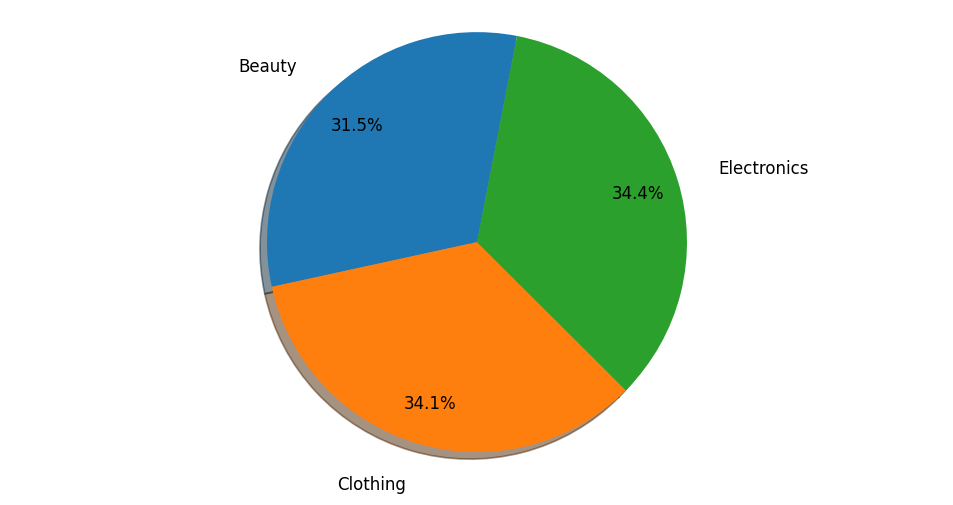

In [ ]:
fig1 = plt.figure(dpi = 120,figsize=(10,5))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.pie(fil_ventas.values,labels=fil_ventas.index,autopct='%1.1f%%',shadow = True,startangle=79, pctdistance=0.8,labeldistance=1.2)
ax1.axis('equal')
plt.show()

El grafico de torta muestra el porcentaje de ventas por productos de las tiendas 1,2 y 3 en los años 2023 y 2024. Donde el producto electronic tiene el mayor porcentaje de ventas

# EXPLORACION DE DATOS AVANZADOS

Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

Crea subplots para comparar diferentes variables clave.

Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la informació

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_1.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Año,Mes,Dia,mean_sales,deviation
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,3,2023,11,24,467.47557,-317.47557
1,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,3,2023,5,6,467.47557,-367.47557
2,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30,Baja,3,2023,4,25,467.47557,-437.47557
3,12,2023-10-30,CUST012,Male,35,Beauty,3,25,75,75,Baja,3,2023,10,30,467.47557,-392.47557
4,21,2023-01-14,CUST021,Female,50,Beauty,1,500,500,500,Baja,3,2023,1,14,467.47557,32.52443


In [ ]:
df_1.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Sales,Tienda,Año,Mes,Dia,mean_sales,deviation
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,2023-07-03 00:25:55.199999744,41.39200,2.514000,179.890000,456.000000,456.000000,1.956000,2023.002000,6.549000,15.310000,456.000000,3.092282e-14
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,25.000000,1.000000,2023.000000,1.000000,1.000000,443.247863,-4.424756e+02
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,60.000000,1.000000,2023.000000,4.000000,7.000000,443.247863,-3.924756e+02
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,135.000000,2.000000,2023.000000,6.000000,15.000000,458.786550,-3.203617e+02
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,900.000000,3.000000,2023.000000,10.000000,23.000000,467.475570,4.325244e+02
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2000.000000,3.000000,2024.000000,12.000000,31.000000,467.475570,1.556752e+03
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,559.997632,0.810383,0.044699,3.452755,8.871674,10.013133,5.599081e+02


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Sales             1000 non-null   int64         
 10  categoria_ventas  1000 non-null   category      
 11  Tienda            1000 non-null   int64         
 12  Año               1000 non-null   int32         
 13  Mes               1000 non-null   int32         
 14  Dia               1000 no

In [ ]:
df_1.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Sales', 'categoria_ventas', 'Tienda', 'Año', 'Mes', 'Dia',
       'mean_sales', 'deviation'],
      dtype='object')

Elimianremos la columna Date porque la hemos dividido en 3 columnas (Año, Mes y Dia).

Tambien eliminaremos las columnas mean_sales y deviation que fueron creadas para hacer las agrupaciones, pero para el analisis de Machine Learning que vamos a realziar a continuacion no son necesarias.

In [ ]:
df_1 = df_1.drop(['Date', 'mean_sales', 'deviation'], axis=1)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    1000 non-null   int64   
 1   Customer ID       1000 non-null   object  
 2   Gender            1000 non-null   object  
 3   Age               1000 non-null   int64   
 4   Product Category  1000 non-null   object  
 5   Quantity          1000 non-null   int64   
 6   Price per Unit    1000 non-null   int64   
 7   Total Amount      1000 non-null   int64   
 8   Sales             1000 non-null   int64   
 9   categoria_ventas  1000 non-null   category
 10  Tienda            1000 non-null   int64   
 11  Año               1000 non-null   int32   
 12  Mes               1000 non-null   int32   
 13  Dia               1000 non-null   int32   
dtypes: category(1), int32(3), int64(7), object(3)
memory usage: 91.1+ KB


In [ ]:
correlation_matrix = df_1[['Transaction ID','Age','Quantity','Price per Unit','Total Amount','Sales','Tienda','Año','Mes','Dia',]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   
Sales                -0.075034 -0.060568  0.373707        0.851925   
Tienda               -0.003588 -0.045932 -0.013504        0.021133   
Año                  -0.010855  0.023269 -0.020324        0.020097   
Mes                   0.047538 -0.000640 -0.021803       -0.008161   
Dia                  -0.005052  0.041899  0.029650        0.018303   

                Total Amount     Sales    Tienda       Año       Mes       Dia  
Transaction ID     -0.075034 -0.075034 -0.003588 -0.010855  0.047538 -0.005052  
Age                -0.060568 -0.060568 -0

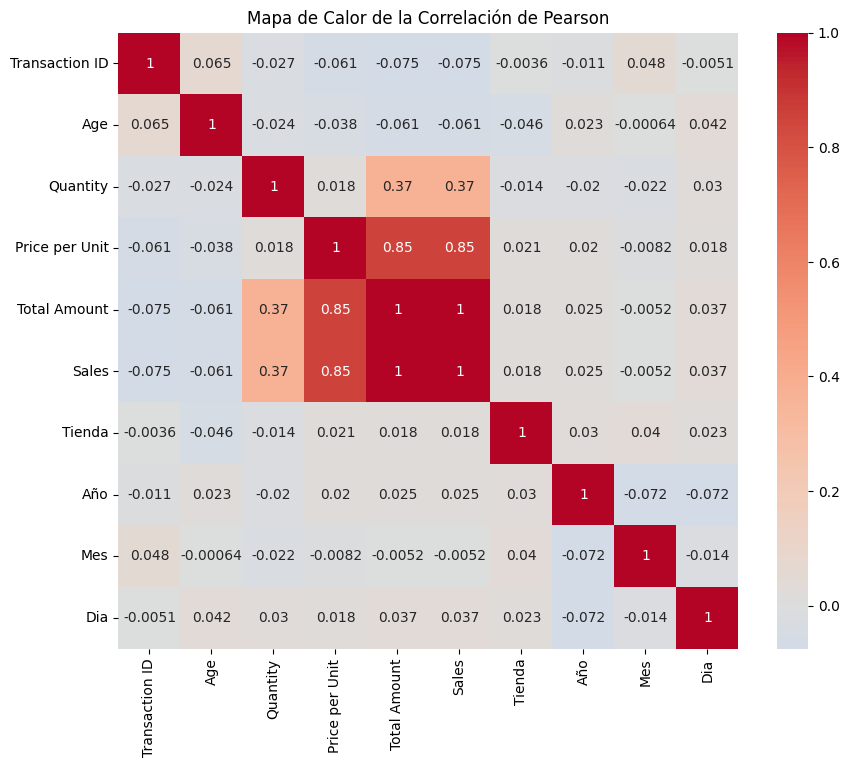

In [ ]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

In [ ]:
df_1['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
df_1['Tienda'].unique()

array([3, 1, 2])

In [ ]:
tiendas = df_1['Tienda'].unique()
tiendas

array([3, 1, 2])

In [ ]:
tiendas = df_1['Tienda'].unique()
df_2 = df_1[df_1['Tienda'] == tiendas[0]]
df_3 = df_1[df_1['Tienda'] == tiendas[1]]
df_4 = df_1[df_1['Tienda'] == tiendas[2]]

Subplot creado con plt y sns

(0.0, 2200.0)

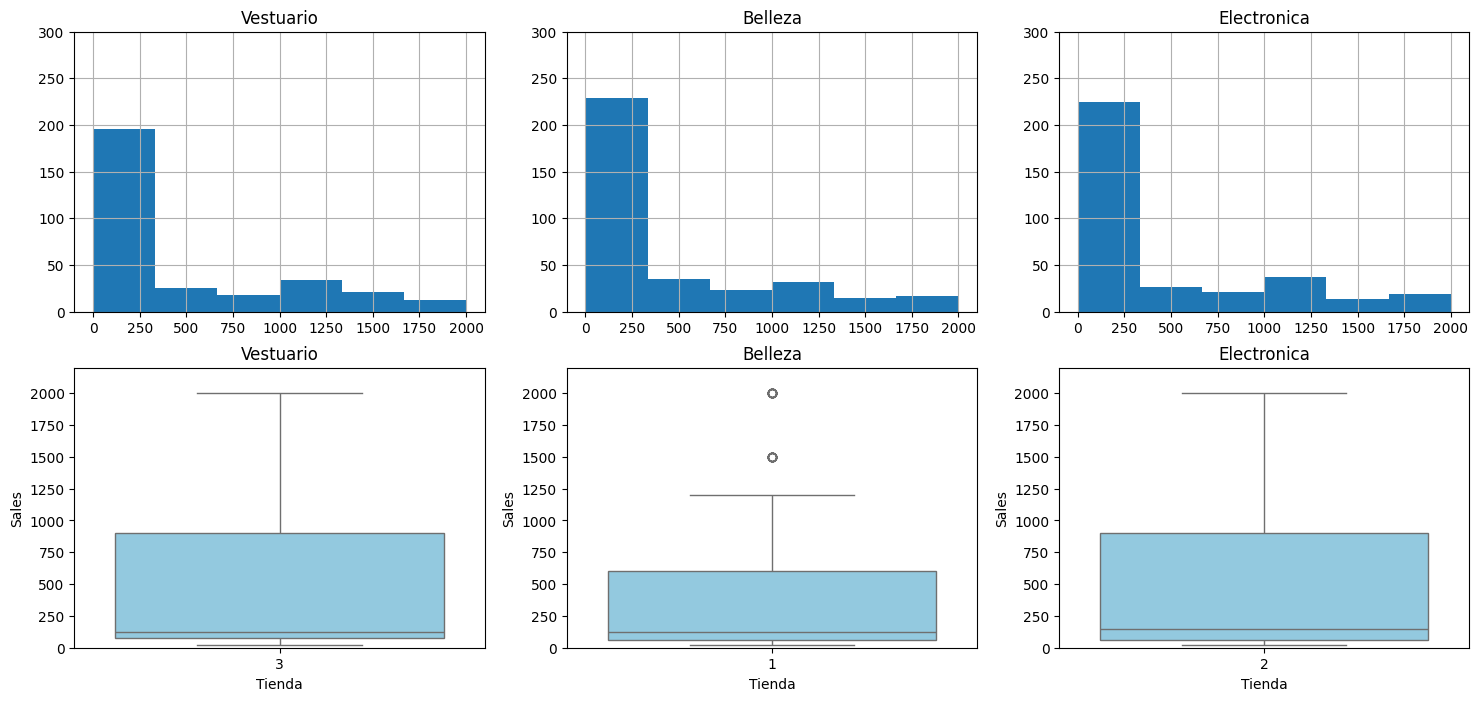

In [ ]:
#Creamos manualmente cada histograma
plt.figure(figsize=(18,8))
#subplot1
plt.subplot(2,3,1)
df_1[df_1["Tienda"] == tiendas[0]]["Sales"].hist(bins=6,range=(0,2000))
plt.title('Vestuario')
plt.ylim(0, 300)

#subplot2
plt.subplot(2,3,2)
df_1[df_1["Tienda"] == tiendas[1]]["Sales"].hist(bins=6, range=(0,2000))
plt.title('Belleza')
plt.ylim(0, 300)

#subplot3
plt.subplot(2,3,3)
df_1[df_1["Tienda"] == tiendas[2]]["Sales"].hist(bins=6, range=(0,2000))
plt.title('Electronica')
plt.ylim(0, 300)

#subplot4
plt.subplot(2,3,4)
sns.boxplot(x='Tienda', y='Sales', data=df_2, color='skyblue')
plt.title('Vestuario')
plt.ylim(0, 2200)

#subplot5
plt.subplot(2,3,5)
sns.boxplot(x='Tienda', y='Sales', data=df_3, color='skyblue')
plt.title('Belleza')
plt.ylim(0, 2200)

#subplot6
plt.subplot(2,3,6)
sns.boxplot(x='Tienda', y='Sales', data=df_4, color='skyblue')
plt.title('Electronica')
plt.ylim(0, 2200)

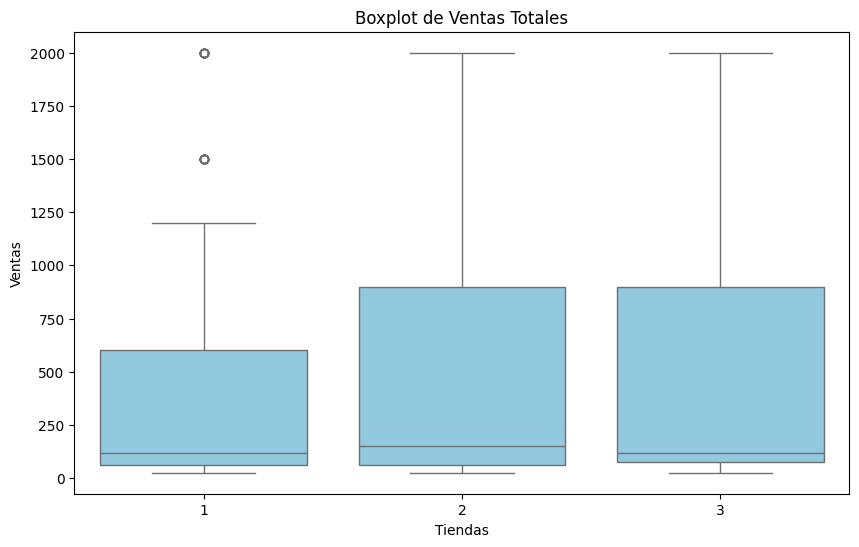

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tienda', y='Sales', data=df_1, color='skyblue')
plt.title("Boxplot de Ventas Totales")
plt.xlabel("Tiendas")
plt.ylabel("Ventas")
plt.show()

# Parte 2: Preprocesamiento de Datos

**Transformación de Columnas:**

Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

Realizar codificación de variables categóricas y escalado de variables numéricas.

**Pipelines:**

Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
df_1.head(5)

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,categoria_ventas,Tienda,Año,Mes,Dia
0,1,CUST001,Male,34,Beauty,3,50,150,150,Baja,3,2023,11,24
1,5,CUST005,Male,30,Beauty,2,50,100,100,Baja,3,2023,5,6
2,6,CUST006,Female,45,Beauty,1,30,30,30,Baja,3,2023,4,25
3,12,CUST012,Male,35,Beauty,3,25,75,75,Baja,3,2023,10,30
4,21,CUST021,Female,50,Beauty,1,500,500,500,Baja,3,2023,1,14


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    1000 non-null   int64   
 1   Customer ID       1000 non-null   object  
 2   Gender            1000 non-null   object  
 3   Age               1000 non-null   int64   
 4   Product Category  1000 non-null   object  
 5   Quantity          1000 non-null   int64   
 6   Price per Unit    1000 non-null   int64   
 7   Total Amount      1000 non-null   int64   
 8   Sales             1000 non-null   int64   
 9   categoria_ventas  1000 non-null   category
 10  Tienda            1000 non-null   int64   
 11  Año               1000 non-null   int32   
 12  Mes               1000 non-null   int32   
 13  Dia               1000 non-null   int32   
dtypes: category(1), int32(3), int64(7), object(3)
memory usage: 91.1+ KB


Para realizar el analisis de ventas en una tienda de Retail debemos seleccionar las variables que utilizaremos como ademas nuestra variable objetivo.

En el mapa de calor, la columna Transaction ID no tiene relacion con ninguna columna, por lo tanto la vamos a eliminar de nuestro analisis, tambien eliminaremos la columna Customer ID ya que tampoco pareciera ser relevante para este analisis.

Nuestra variable objetivo sera la columna Gender

In [ ]:
df_1 = df_1.drop(['Transaction ID', 'Customer ID','categoria_ventas'], axis=1)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1000 non-null   object
 1   Age               1000 non-null   int64 
 2   Product Category  1000 non-null   object
 3   Quantity          1000 non-null   int64 
 4   Price per Unit    1000 non-null   int64 
 5   Total Amount      1000 non-null   int64 
 6   Sales             1000 non-null   int64 
 7   Tienda            1000 non-null   int64 
 8   Año               1000 non-null   int32 
 9   Mes               1000 non-null   int32 
 10  Dia               1000 non-null   int32 
dtypes: int32(3), int64(6), object(2)
memory usage: 74.3+ KB


In [ ]:
df_1.duplicated().sum()

0

In [ ]:
y = df_1['Gender']
X = df_1.drop('Gender', axis = 'columns')

In [ ]:
X

,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales,Tienda,Año,Mes,Dia
0,34,Beauty,3,50,150,150,3,2023,11,24
1,30,Beauty,2,50,100,100,3,2023,5,6
2,45,Beauty,1,30,30,30,3,2023,4,25
3,35,Beauty,3,25,75,75,3,2023,10,30
4,50,Beauty,1,500,500,500,3,2023,1,14
...,...,...,...,...,...,...,...,...,...,...
995,44,Electronics,1,25,25,25,2,2023,12,28
996,57,Electronics,2,30,60,60,2,2023,8,21
997,48,Electronics,3,50,150,150,2,2023,2,6
998,36,Electronics,3,50,150,150,2,2023,12,5


In [ ]:
y

,Gender
0,Male
1,Male
2,Female
3,Male
4,Female
...,...
995,Female
996,Female
997,Female
998,Female


# Parte 3: Benchmarking de Técnicas de Machine Learning

**Selección de Modelos:**

Entrenar y evaluar múltiples modelos de machine learning por ejemplo:

Regresión Logistica

KNN

Árbol de Decisión

Random Forest

XGBoost

LGBM

Utilizar validación cruzada para evaluar el rendimiento de los modelos.

In [ ]:
!pip install lightgbm

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
label = LabelEncoder()
y = label.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
col_num = []
col_cat = []

for a in range(0, len(X.columns)):
  if X[X.columns[a]].dtype == 'object':
    col_cat.append(X.columns[a])
  else:
    col_num.append(X.columns[a])

print(col_num)
print(col_cat)

['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Sales', 'Tienda', 'Año', 'Mes', 'Dia']
['Product Category']


In [ ]:
num_imputer = SimpleImputer(strategy = 'mean')
cat_imputer = SimpleImputer(strategy = 'most_frequent')

ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

pipe_num = Pipeline(steps = [('imputer', num_imputer),
                             ('scaler', scaler)])
pipe_cat = Pipeline(steps = [('imputer', cat_imputer),
                             ('encoder', ohe)])

preprocessor = ColumnTransformer(transformers = [('num', pipe_num, col_num),
                                                ('cat', pipe_cat, col_cat)])

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_tree = DecisionTreeClassifier(max_depth = len(X.columns), random_state = 42)
model_forest = RandomForestClassifier(n_estimators = 100, max_depth = len(X.columns), random_state = 42)
model_LR = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs',
                                 max_iter=100, tol=1e-4, random_state=42)
model_lgbm = lgb.LGBMClassifier(random_state=42)
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipe_knn = Pipeline(steps = [('pp', preprocessor),
                             ('model', model_knn)])
pipe_tree = Pipeline(steps = [('pp', preprocessor),
                             ('model', model_tree)])
pipe_forest = Pipeline(steps = [('pp', preprocessor),
                             ('model', model_forest)])

pipe_LR = Pipeline(steps=[("pp", preprocessor),
                          ("model", model_LR)])
pipe_lgbm = Pipeline(steps=[("pp", preprocessor),
                            ("model", model_lgbm)])

pipe_xgb = Pipeline(steps=[("pp", preprocessor),
                            ("model", model_xgb)])


In [ ]:
# Entrenar el modelo
pipe_knn.fit(X_train, y_train)
pipe_tree.fit(X_train, y_train)
pipe_forest.fit(X_train, y_train)
pipe_LR.fit(X_train, y_train)
pipe_lgbm.fit(X_train, y_train)
pipe_xgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 378, number of negative: 422
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.472500 -> initscore=-0.110111
[LightGBM] [Info] Start training from score -0.110111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:37:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit',
                                                   'Total Amount', 'Sales',
                                                   'Tienda', 'Año', 'Mes',
                                                   'Dia']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['P...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Realizar Predicciones
y_pred_knn = pipe_knn.predict(X_test)
y_pred_tree = pipe_tree.predict(X_test)
y_pred_forest = pipe_forest.predict(X_test)
y_pred_LR = pipe_LR.predict(X_test)
y_pred_lgbm = pipe_lgbm.predict(X_test)
y_pred_xgb = pipe_xgb.predict(X_test)


In [ ]:
y_pred_lgbm = pipe_lgbm.predict(X_test)
y_prob_lgbm = pipe_lgbm.predict_proba(X_test)[:, 1]

In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# KNN

Precisión del modelo: 47.00%
Reporte de Clasificacion por knn
              precision    recall  f1-score   support

           0       0.42      0.52      0.46        88
           1       0.53      0.43      0.48       112

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



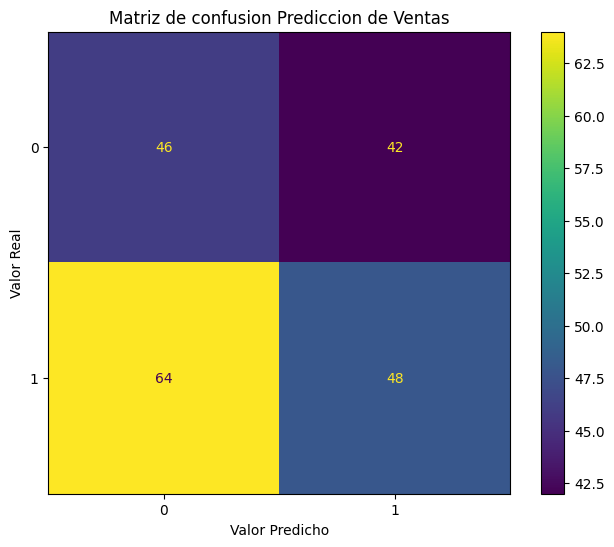

In [ ]:
score_knn = pipe_knn.score(X_test, y_test)
print(f"Precisión del modelo: {score_knn * 100:.2f}%")
cm=confusion_matrix(y_test,y_pred_knn)
print("Reporte de Clasificacion por knn")
print(classification_report(y_test,y_pred_knn))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Prediccion de Ventas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# ARBOL

Precisión del modelo: 45.00%
Reporte de Clasificacion por tree
              precision    recall  f1-score   support

           0       0.41      0.56      0.47        88
           1       0.51      0.37      0.43       112

    accuracy                           0.45       200
   macro avg       0.46      0.46      0.45       200
weighted avg       0.47      0.45      0.45       200



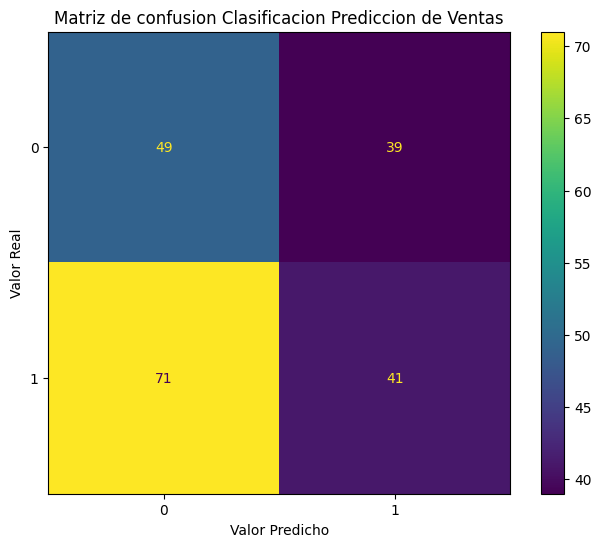

In [ ]:
score_tree = pipe_tree.score(X_test, y_test)
print(f"Precisión del modelo: {score_tree * 100:.2f}%")
cm=confusion_matrix(y_test,y_pred_tree)
print("Reporte de Clasificacion por tree")
print(classification_report(y_test,y_pred_tree))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de Ventas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# FOREST

Precisión del modelo: 52.50%
Reporte de Clasificacion por forest
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        88
           1       0.60      0.47      0.53       112

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.54      0.53      0.53       200



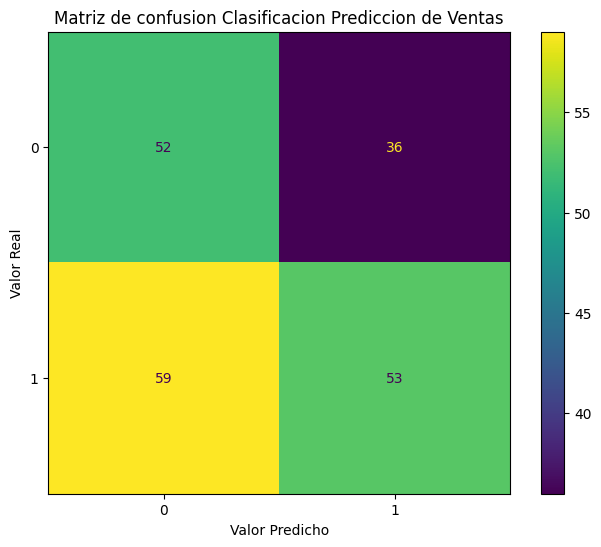

In [ ]:
score_forest = pipe_forest.score(X_test, y_test)
print(f"Precisión del modelo: {score_forest * 100:.2f}%")
cm=confusion_matrix(y_test,y_pred_forest)
print("Reporte de Clasificacion por forest")
print(classification_report(y_test,y_pred_forest))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de Ventas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# XGBoost

Precisión del modelo: 52.50%
Exactitud: 0.47
Reporte de Clasificacion por lgbm
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        88
           1       0.53      0.42      0.47       112

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



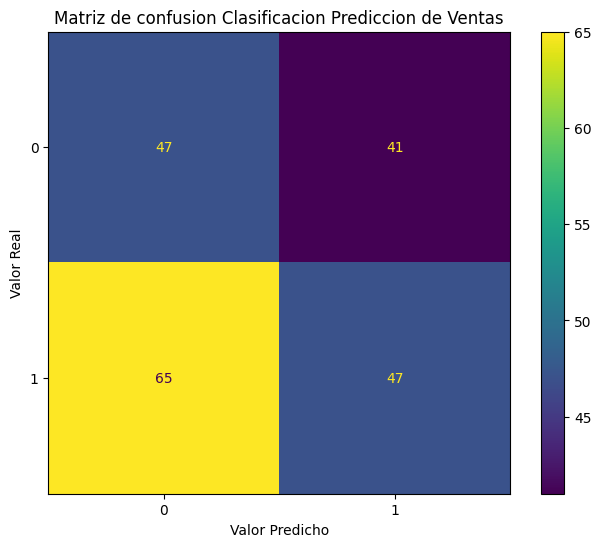

In [ ]:
score_lgbm = pipe_lgbm.score(X_test, y_test)
print(f"Precisión del modelo: {score_forest * 100:.2f}%")
y_prob_lgbm = pipe_lgbm.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f'Exactitud: {accuracy}')

cm=confusion_matrix(y_test,y_pred_lgbm)
print("Reporte de Clasificacion por lgbm")
print(classification_report(y_test,y_pred_lgbm))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de Ventas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

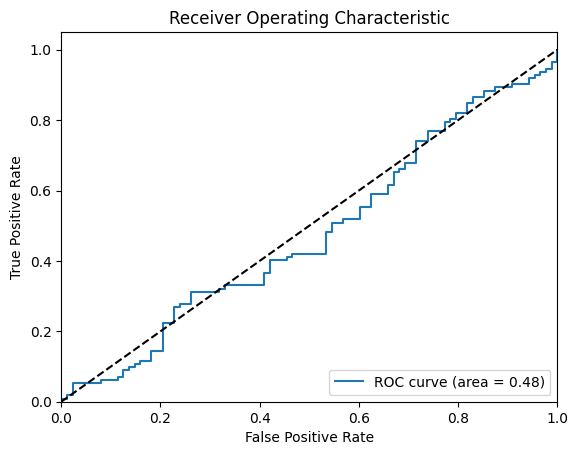

In [ ]:
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgbm)
auc = roc_auc_score(y_test, y_prob_lgbm)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Optimización con GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train = pd.get_dummies(X_train)
model_xgb = XGBClassifier()

In [ ]:
# Definir el espacio de hiperparámetros
param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.7, 0.8, 0.9]
}

In [ ]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "model__learning_rate", "model__max_depth", "model__n_estimators", "model__subsample" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.7}


In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_lgbm))

Exactitud del mejor modelo: 0.47
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        88
           1       0.53      0.42      0.47       112

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



Matriz de Confusión:
[[47 41]
 [65 47]]


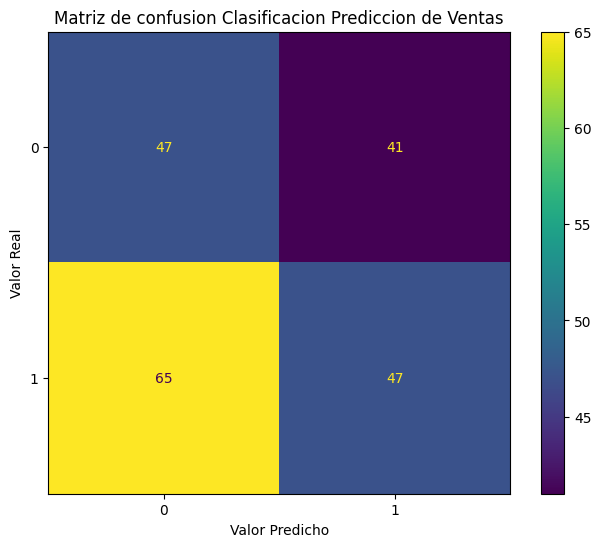

In [ ]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
print('Matriz de Confusión:')
print(conf_matrix)
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de Ventas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# COMENTARIO FINAL

Todos lo modelos presentan una precision de 100% lo que indica que el modelo no esta funcionando bien.

El problema puede estar en el desbalanceo en la variable objetivo, esto  puede ser una gran parte del problema. Cuando una clase es mucho más frecuente que la otra, el modelo puede aprender a predecir solo la clase mayoritaria para obtener una precisión alta. Esto puede resultar en un rendimiento engañoso del modelo.

Aquí hay algunos pasos que se deben considerar:

Revisar el Desbalanceo de Clases: Analizar la distribución de las clases en la variable objetivo. Hay muchas más instancias de  clase 0 que de la clase 1, eso podría ser la razón del rendimiento perfecto.

Técnicas de Manejo de Desbalanceo:

Submuestreo: Reducir la cantidad de ejemplos de la clase mayoritaria.

Sobremuestreo: Aumentar la cantidad de ejemplos de la clase minoritaria, por ejemplo, usando SMOTE (Synthetic Minority Over-sampling Technique).

Ajuste de Pesos: ajustar los pesos de las clases en el modelo.


Entrenar con Datos Balanceados: entrenar el modelo usando un conjunto de datos balanceado y observar si la precisión baja a valores más realistas.

Validación Cruzada: Implementa validación cruzada estratificada para asegurse de que cada pliegue tenga una representación similar de ambas clases.